# Data Science Project for Beginners

## Natalie Speiser und Jens Beyer

# What do you think about when you want to start a data science project?

best data <br>
best model <br>
best prediction (close to reality)

# Where does it really start?

preparation: <br>

calls with relevant people <br>

getting all relevant people in the room <br>

getting access to all relevant data <br>

becoming and staying the organizer of the workshop! <br>

![title](agenda2.png)

# Real Project

goal: CeBIT Exhibitors

combine chocolate and machine learning

# Open the space for ideas 

trigger inspiration with your presentation <br>

show an easy example <br>

especially: Show that data science is not magic <br>



# but close it again!

open space for new ideas <br> 

don't expect the client to speak with one voice <br>

focus on relevant information <br>

# Real Project

many ideas: <br>

predictive maintenance and chocolate

### Predictive Chocolate

# How to win internal competition over



![Image](https://media.giphy.com/media/AoqqZcR59ovJK/giphy.gif)

take them serious <br>

what are the real problems? <br>

coffee breaks are great for that <br>

# Data collection

we asked 113 people <br>

22 questions concerning taste

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost
from sklearn import tree
from sklearn.tree import _tree
import pydotplus
from IPython.display import Image, display, clear_output
from ipywidgets import widgets, Layout
import time

In [2]:
pd.set_option('max_columns', 30)

In [3]:
trainData = pd.read_csv("schoko_num.csv")
trainData = trainData / 5
trainData.columns= trainData.columns.str.rsplit('...').str[1] #only take the last word of each columns

In [4]:
trainData.head()

,Bier.,Wein.,Kaffee.,Tee.,Sauerkraut.,Kapern.,Geräucherten.Schinken.,Intensiven.Käse.,Zwieback.,Milchreis.,Klassik.,Rock.,Pop.,Metal.,Techno.,Charts.,Schlager.,Rot.,Gelb.,Grün.,Blau.,Schwarz.,Vollmilch.,Haselnuss.,Knusperflakes.,Nougat.,Joghurt.,Marzipan.,Knusperkeks.
0,1.0,1.0,1.0,0.8,0.8,1.0,0.6,0.8,1.0,0.8,0.8,0.8,0.8,1.0,0.2,0.4,0.4,0.6,0.6,0.8,1.0,0.8,0.4,0.8,1.0,1.0,0.6,0.8,0.8
1,0.6,1.0,1.0,0.8,0.6,0.2,1.0,0.8,0.2,0.4,0.6,0.6,0.8,0.2,0.4,0.8,0.2,0.8,0.8,1.0,0.8,0.4,0.4,1.0,0.4,1.0,0.8,0.2,0.6
2,1.0,0.8,1.0,0.6,0.6,0.6,1.0,1.0,0.6,0.8,0.8,0.6,1.0,0.2,0.4,1.0,0.2,1.0,0.8,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.2,1.0
3,0.8,0.6,0.8,0.6,0.8,0.2,0.8,0.8,0.8,0.8,0.6,0.8,0.4,1.0,0.6,0.2,0.2,0.8,0.4,0.8,0.8,0.8,1.0,0.8,0.8,1.0,0.4,0.2,1.0
4,1.0,1.0,0.8,1.0,0.6,0.2,0.6,0.8,0.6,1.0,0.6,0.6,0.8,0.2,0.2,1.0,0.6,0.6,1.0,1.0,0.6,0.6,0.6,0.8,1.0,0.6,1.0,0.4,0.4


# Exploration

In [5]:
trainData.describe()

,Bier.,Wein.,Kaffee.,Tee.,Sauerkraut.,Kapern.,Geräucherten.Schinken.,Intensiven.Käse.,Zwieback.,Milchreis.,Klassik.,Rock.,Pop.,Metal.,Techno.,Charts.,Schlager.,Rot.,Gelb.,Grün.,Blau.,Schwarz.,Vollmilch.,Haselnuss.,Knusperflakes.,Nougat.,Joghurt.,Marzipan.,Knusperkeks.
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.716814,0.723894,0.768142,0.791150,0.647788,0.477876,0.722124,0.716814,0.573451,0.681416,0.647788,0.718584,0.688496,0.446018,0.484956,0.628319,0.376991,0.718584,0.631858,0.776991,0.826549,0.748673,0.739823,0.782301,0.741593,0.706195,0.660177,0.584071,0.768142
std,0.287509,0.258178,0.269346,0.197103,0.243889,0.258338,0.239693,0.272194,0.212980,0.253035,0.215927,0.233968,0.190747,0.269932,0.261596,0.243292,0.219987,0.190183,0.188161,0.188513,0.170093,0.220030,0.251971,0.241361,0.234035,0.271334,0.276309,0.323090,0.244316
min,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.400000,0.600000,0.600000,0.600000,0.600000,0.200000,0.600000,0.600000,0.400000,0.600000,0.600000,0.600000,0.600000,0.200000,0.200000,0.400000,0.200000,0.600000,0.600000,0.600000,0.800000,0.600000,0.600000,0.800000,0.600000,0.600000,0.400000,0.200000,0.600000
50%,0.800000,0.800000,0.800000,0.800000,0.600000,0.400000,0.800000,0.800000,0.600000,0.800000,0.600000,0.800000,0.800000,0.400000,0.400000,0.600000,0.200000,0.800000,0.600000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.600000,0.600000,0.800000
75%,1.000000,1.000000,1.000000,1.000000,0.800000,0.600000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,0.600000,0.800000,0.800000,0.600000,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


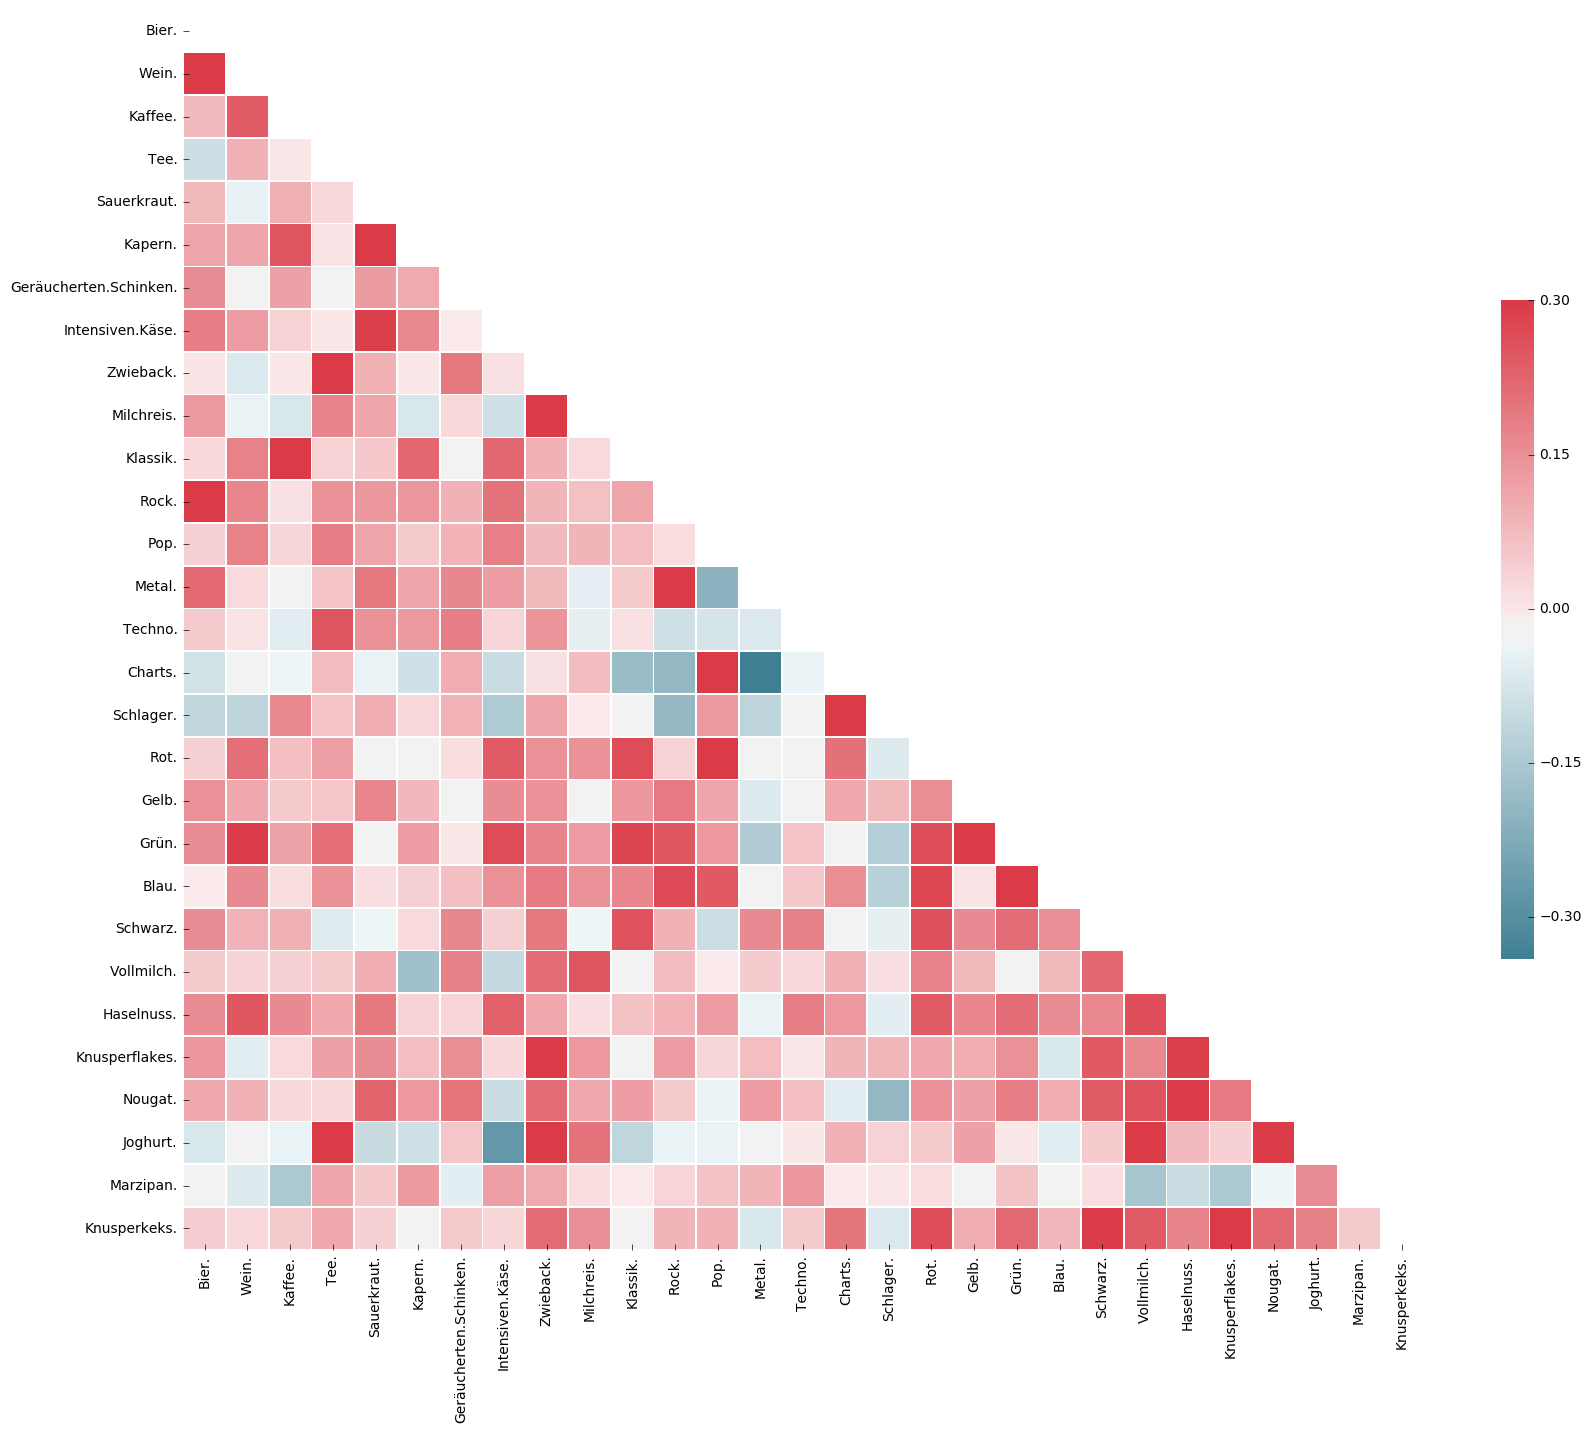

In [6]:
from string import ascii_letters
d = trainData
# Compute the correlation matrix
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 17))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation=0) #Labels werden direkt an die Korrelationen geschrieben
plt.xticks(rotation=90);

# Iteration!

as fast as possible <br>

people come to new ideas about relevant features<br>

show historical data to the client

![title](Kreislauf2.png)

# Predictive Chocolate

first idea: xgboost <br>
7 flavours : 7 models

In [7]:
trainData.columns= trainData.columns.str.replace('.', '') #get rid of .
names = trainData.columns[0:22]
sorten = trainData.columns[22:29]
trainX=trainData.ix[:,0:22].copy()

In [8]:
#%%time
model={}
pred={}
for sorte in sorten:
    trainY=trainData[sorte].copy()
    model[sorte] = xgboost.XGBRegressor()
    model[sorte].fit(trainX, trainY)
    pred[sorte]= model[sorte].predict(trainX)
    error=np.mean(np.abs(pred[sorte]-trainY))

In [9]:
def featureRank(sorte="Vollmilch"):
    print("Feature ranking of Sorte: " + sorte)
    importances = model[sorte].feature_importances_
    indices = np.argsort(importances)[::-1]
    namessort = names[indices]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(trainX.shape[1]), importances[indices],
           color="purple", align="center")
    plt.xticks(range(trainX.shape[1]), namessort, rotation=90)
    plt.xlim([-1, trainX.shape[1]])
    plt.show()

Feature ranking of Sorte: Vollmilch


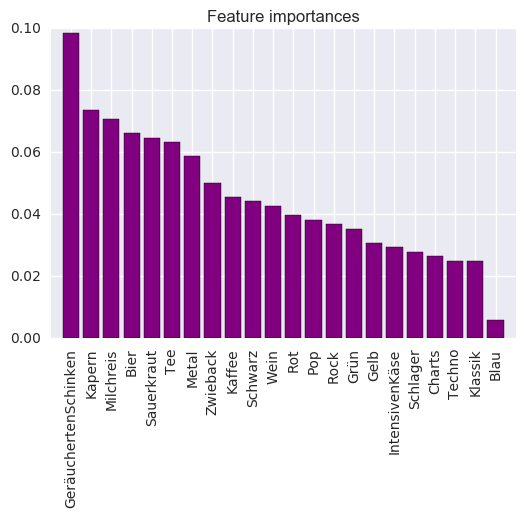

Feature ranking of Sorte: Haselnuss


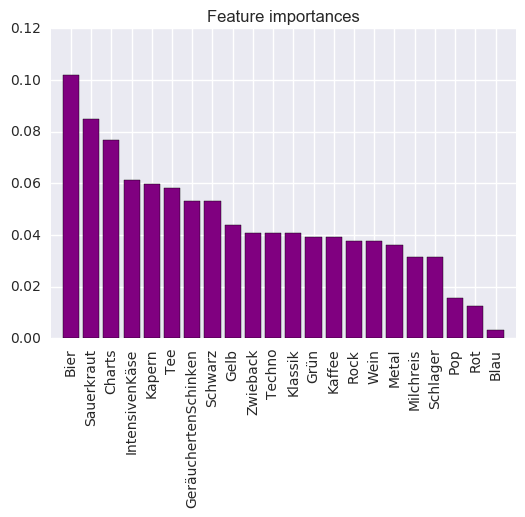

Feature ranking of Sorte: Knusperflakes


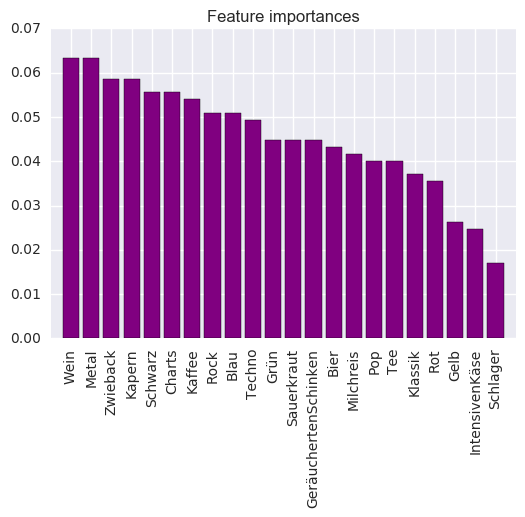

Feature ranking of Sorte: Nougat


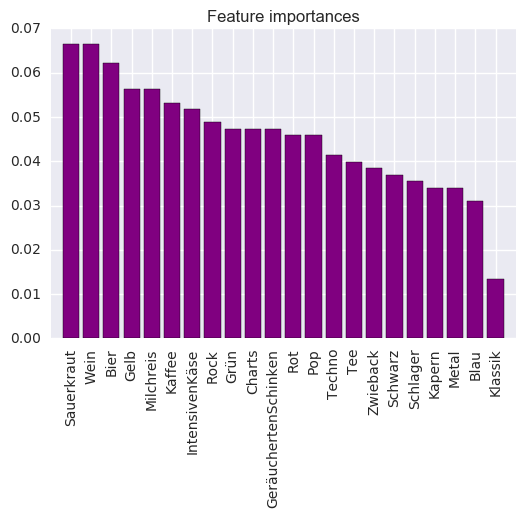

Feature ranking of Sorte: Joghurt


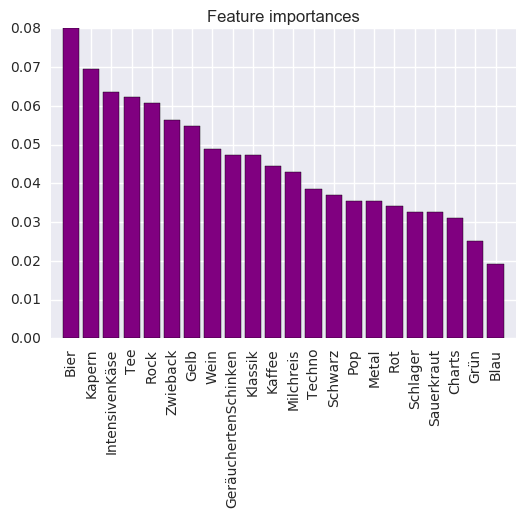

Feature ranking of Sorte: Marzipan


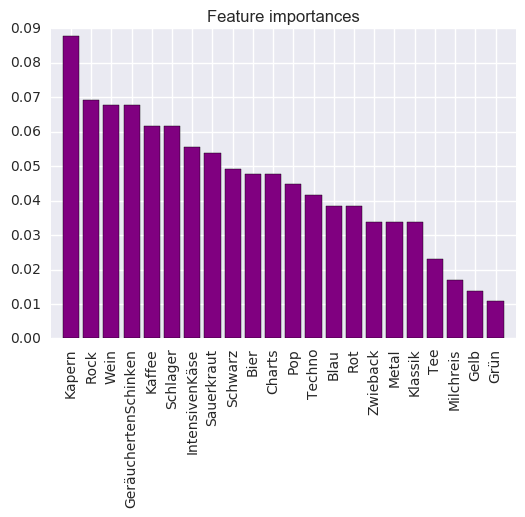

Feature ranking of Sorte: Knusperkeks


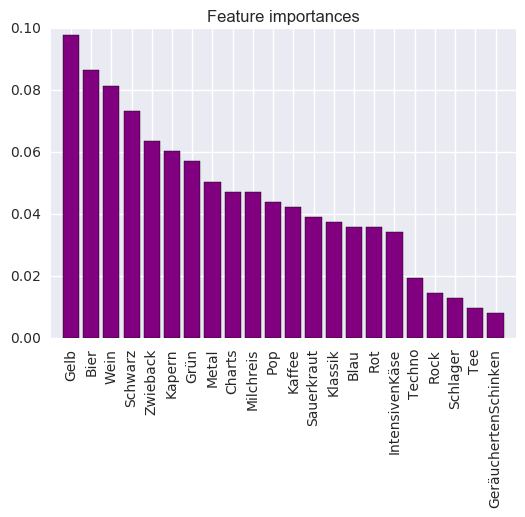

In [10]:
sns.set()
for sorte in sorten:
    featureRank(sorte)

# What is your client's goal?

potential dimensions:<br>

complexity <br>
interpretable <br>
computational ressources <br>
accuracy<br>

# Predictive Chocolate

xgboost is too complicated <br>

dimension reduction, dynamically: Decision tree

In [11]:
clf = tree.DecisionTreeRegressor(min_samples_leaf=4) 
trainYmult = trainData.ix[:,22:29]
clf = clf.fit(trainX, trainYmult)

In [12]:
x = [" ",'1','2','3','4','5']
variable=0
feature_names=names
schongeklickt={}#merkt sich alle klicks, um wiederholungen zu vermeiden
def redraw(turn, variable):
  
    tree_ = clf.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    def recurse(node, depth):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            
            if name in schongeklickt.keys():
                if float(schongeklickt[name])/5 <= threshold:                    
                    recurse(tree_.children_left[node], depth + 1)
                else:  
                    recurse(tree_.children_right[node], depth + 1)
            else:
                togl = widgets.ToggleButtons(
                    options=x,
                    description=name,
                    disabled=False,
                    button_style='', 
                    tooltip='Description')
                display(togl)
                def on_click(value):
                    if togl.value == " ":
                        pass
                    else:
                        schongeklickt[name]=togl.value
                        if float(togl.value)/5 <= threshold:
                            togl.disabled=True

                            recurse(tree_.children_left[node], depth + 1)
                        else:  
                            togl.disabled=True
                            recurse(tree_.children_right[node], depth + 1)
                togl.observe(on_click, 'value')
        else:
            ergebnisse={}
            for i in range(0, len(sorten)):
                sorte= sorten[i]
                prozent = str(tree_.value[node][i][0])
                ergebnisse[sorte]=prozent
            zweisort= sorted(ergebnisse, key=ergebnisse.get, reverse = True)
            schokovar = str(zweisort[0])+ ".jpg"
            display(Image(schokovar))
            schokovar2 = str(zweisort[1])+ ".jpg"
            display(Image(schokovar2))
            schokovar3 = str(zweisort[2])+ ".jpg"
            display(Image(schokovar3))
            for i in range(0,len(sorten)): 
                print(zweisort[i] + ": " + ergebnisse[zweisort[i]]) 
    recurse(0, 1)

redraw(0, 0) # initializes the first choice

# Every model is wrong...

statistical models != truth <br>

BUT often: <br>
intuition < statistical models <br>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ... but some are useful
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; George Box, 1978

# It depends on the case!

sometimes even a simple decision tree is the best solution<br>

Predictive Chocolate - come to us and test the power of a very simple model!


# take a deeper dive into data science and python

Analytics Vidhya <br>
kaggle kernels <br>
Linear digressions <br>
<br>
<br>
predictive chocolate questionnaire: <br>
https://goo.gl/forms/HohIc8t9JbIpbV1l2<br>
<br>
<br>
<br>
<br>
natalie@lavrio.solutions &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; @natalie_lavrio <br>
jens@lavrio.solutions &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; @codingGarden <br>